In [1]:
### Version : Python 3.10.12
### coding : UTF-8


In [2]:
### We import packages

# To manage dataframes
import numpy as np
import pandas as pd

# To do the preprocessing
from sklearn import preprocessing

# To visualize result
import matplotlib.pyplot as plt


In [3]:
### We import our python files

import path_perso

In [4]:
### We import our datasets

lidar_easy = pd.read_parquet(path_perso.lidar_easy_file)
lidar_medium = pd.read_parquet(path_perso.lidar_medium_file)
lidar_hard = pd.read_parquet(path_perso.lidar_hard_file)
lidar_extrahard = pd.read_parquet(path_perso.lidar_extrahard_file)

In [5]:
# We check what the datasets look like
lidar_easy.head(n = 5)

,x,y,z
2211,6.196634,-13.157755,10.582272
2905,-10.440643,17.264460,10.926065
1411,2.977432,-3.552676,10.072814
251,5.924494,-10.974960,10.342501
794,-7.062873,12.850664,10.557997


In [6]:
### We reorder our datasets

list_difficulty = ['easy', 'medium', 'hard', 'extrahard']
list_df = [lidar_easy, lidar_medium, lidar_hard, lidar_extrahard]
dict_df = dict(zip(list_difficulty, list_df))

for df in list_df :
    df.reset_index(drop = False, inplace = True)
    df.sort_values(['index'], ascending = True, inplace = True)
    df.reset_index(drop = True, inplace = True)

In [7]:
# We check result
lidar_easy

,index,x,y,z
0,0,12.027449,-21.919416,11.557937
1,7,11.780415,-21.631120,11.554015
2,8,11.802714,-21.606439,11.468175
3,12,11.725748,-21.450815,11.473142
4,13,11.658920,-21.392229,11.492596
...,...,...,...,...
1497,2997,-12.594755,21.327550,11.458369
1498,2998,-12.662449,21.386325,11.509484
1499,2999,-12.702087,21.339329,11.480640
1500,3001,-12.749286,21.452882,11.526176


In [8]:
### Descriptive stats
# We check the completeness and the coherency of our datasets

for difficulty in dict_df.keys() :
    print(f"{difficulty} :\n")
    print(f"values : {dict_df[difficulty].shape}\n")
    print(f"missing values : {dict_df[difficulty].isnull().sum()}\n")
    print(f"types : {dict_df[difficulty].dtypes}\n")
    print(f"stats : {dict_df[difficulty].describe()}\n")
    print("\n")


easy :

values : (1502, 4)

missing values : index    0
x        0
y        0
z        0
dtype: int64

types : index      int64
x        float64
y        float64
z        float64
dtype: object

stats :              index            x            y            z
count  1502.000000  1502.000000  1502.000000  1502.000000
mean   1482.069907     0.103807    -0.186761    10.506456
std     865.964752     6.860583    12.517748     0.460115
min       0.000000   -12.749286   -22.386120     9.950736
25%     727.500000    -5.811606   -10.936971    10.092309
50%    1467.500000     0.182992    -0.506426    10.378612
75%    2229.750000     5.905952    10.778874    10.854110
max    3002.000000    12.778636    22.128342    11.630552



medium :

values : (2803, 4)

missing values : index    0
x        0
y        0
z        0
dtype: int64

types : index      int64
x        float64
y        float64
z        float64
dtype: object

stats :              index            x            y            z
count  2803

In [9]:
# We can see that there is no missing value in the four datasets
# They have between 601 and 2803 data points, and all data are float, so there is nothing to change
# However, some variables have widest ranges than others
# Hence, there weight will be more important than others
# We must normalize data

In [10]:
### We normalize our data

scaler = preprocessing.MinMaxScaler()
for df in list_df :
    X1 = pd.DataFrame(scaler.fit_transform(df.drop(columns = ['index'])))
    X1 = pd.DataFrame(scaler.fit_transform(df.drop(columns = ['index'])), columns = ["x_norm", "y_norm", "z_norm"])
    df[["x_norm", "y_norm", "z_norm"]] = X1

In [11]:
# We check result
lidar_easy

,index,x,y,z,x_norm,y_norm,z_norm
0,0,12.027449,-21.919416,11.557937,0.970574,0.010484,0.956772
1,7,11.780415,-21.631120,11.554015,0.960897,0.016961,0.954437
2,8,11.802714,-21.606439,11.468175,0.961770,0.017515,0.903337
3,12,11.725748,-21.450815,11.473142,0.958755,0.021011,0.906293
4,13,11.658920,-21.392229,11.492596,0.956138,0.022327,0.917874
...,...,...,...,...,...,...,...
1497,2997,-12.594755,21.327550,11.458369,0.006053,0.982011,0.897499
1498,2998,-12.662449,21.386325,11.509484,0.003402,0.983331,0.927928
1499,2999,-12.702087,21.339329,11.480640,0.001849,0.982275,0.910757
1500,3001,-12.749286,21.452882,11.526176,0.000000,0.984826,0.937865


In [32]:
### We rotate our coordonates
# We rotate our x and y axes
# So our x and y coordonates are in a new axis
# And they will be easier to cluster

# We define the angle of rotation
angle_degrees = -28.65
angle = np.radians(angle_degrees)
# Matrix of rotation
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
# We create a new dataframe with rotated coordonates and we concatenate the dataframes
for df in list_df :
    rotated_points = np.dot(rotation_matrix, np.array([df['x'], df['y']]))
    rotated_df = pd.DataFrame({'x_rotated': rotated_points[0], 'y_rotated': rotated_points[1]})
    df[["x_rotated", "y_rotated"]] = rotated_df


In [ ]:
# We check result
lidar_easy

,index,x,y,z,x_norm,y_norm,z_norm,x_rotated,y_rotated
0,0,12.027449,-21.919416,11.557937,0.970574,0.010484,0.956772,-0.711246,0.660494
1,7,11.780415,-21.631120,11.554015,0.960897,0.016961,0.954437,-0.708685,0.649135
2,8,11.802714,-21.606439,11.468175,0.961770,0.017515,0.903337,-0.709700,0.649334
3,12,11.725748,-21.450815,11.473142,0.958755,0.021011,0.906293,-0.709920,0.644723
4,13,11.658920,-21.392229,11.492596,0.956138,0.022327,0.917874,-0.708927,0.641966
...,...,...,...,...,...,...,...,...,...
1497,2997,-12.594755,21.327550,11.458369,0.006053,0.982011,0.897499,-0.680362,-0.708158
1498,2998,-12.662449,21.386325,11.509484,0.003402,0.983331,0.927928,-0.679348,-0.710941
1499,2999,-12.702087,21.339329,11.480640,0.001849,0.982275,0.910757,-0.677495,-0.711244
1500,3001,-12.749286,21.452882,11.526176,0.000000,0.984826,0.937865,-0.677910,-0.714368


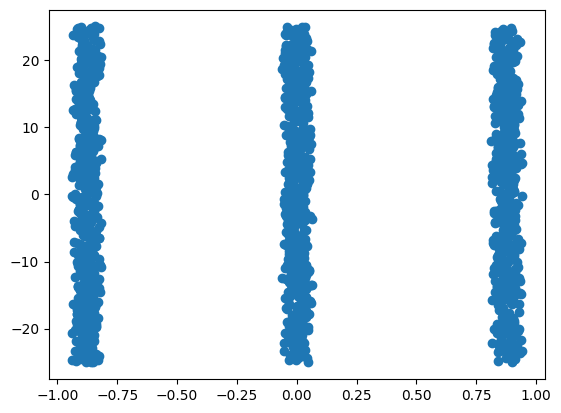

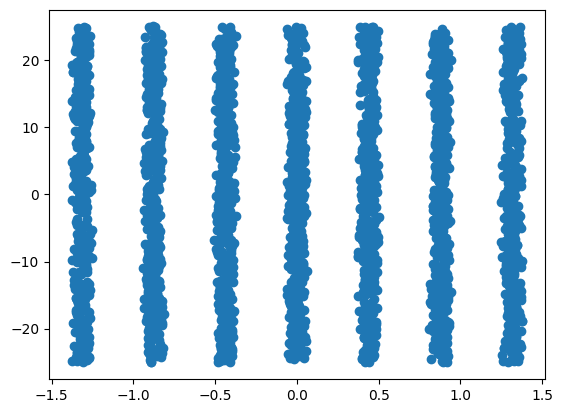

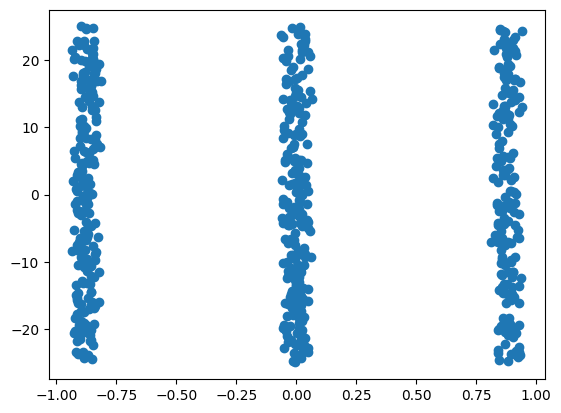

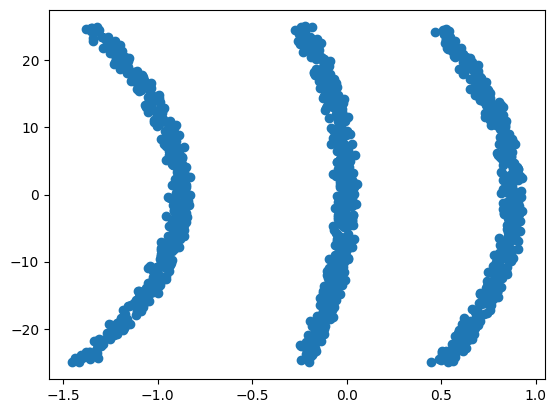

In [34]:
# We visualize result
for df in list_df : 
    x = df['x_rotated']
    y = df['y_rotated']
    plt.scatter(x, y)
    plt.show()